<a href="https://colab.research.google.com/github/gitnao95/Projets-Analyse-de-donnees/blob/main/Projet_AFC_sciences_sociales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROJET D'APPLICATION DE L'ANALYSE FACTORIELLE DES CORRESPONDANCES (AFC) EN SCIENCES SOCIALES

##OBJECTIF DU PROJET : Ce projet consiste à analyser les comportements électoraux pour étudier les ressemblances et les dissemblances au point de vue des tendances de vote des candidats dans les departements d'Ile de France.

## DESCRIPTION DE LA BASE DE DONNEES : La base de données est un tableau de contingence (ou tableau de correspondance) entre deux variables qualitatives que sont les départements de vote et les candidats à l'election présidentielle de 2022 en France. Elle est constituée de 8 lignes correspondant au département d'ile de France et 13 colonnes correspondant aux candidats.

## SOURCE DE LA BASE DE DONNEES : Ces données sont disponibles sur le site du ministère de l'interieur Français. Sur le lien ci-dessous, les resultats des élections sont fournis par département. https://www.archives-resultats-elections.interieur.gouv.fr/resultats/presidentielle-2022/011/011.php


In [21]:
#Importation des packages
#!pip install fanalysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#package fanalysis pour faire l'AFC
from fanalysis.ca import CA

In [22]:
#chargement de la base de donnée
data = pd.read_excel('election_2022_FR.xlsx')

#affichage des premières lignes
data.head(10)

,Departement,Nathalie ARTHAUD,Fabien ROUSSEL,Emmanuel MACRON,Jean LASSALLE,Marine LE PEN,Éric ZEMMOUR,Jean-Luc MÉLENCHON,Anne HIDALGO,Yannick JADOT,Valérie PÉCRESSE,Philippe POUTOU,Nicolas DUPONT-AIGNAN
0,Seine-Saint-Denis,2756,11642,110118,6805,64543,27969,266632,5890,19352,17481,3663,6300
1,Val-de-Marne,2504,14954,171409,8944,69599,43430,192427,8276,31904,32522,3730,9359
2,Val-d'Oise,2392,10060,138166,9101,91081,37564,175666,6094,20710,26403,3352,8996
3,Essonne,2831,13480,164503,11610,105862,39284,167310,7944,29562,33046,4306,15203
4,Hauts-de-Seine,2306,13170,287494,11260,64812,62761,199640,10518,47103,62231,3704,9743
5,Paris,2891,17267,372820,12139,58429,86088,317372,22901,80268,69564,5732,9591
6,Seine-et-Marne,3440,12843,165208,13797,155738,47893,170969,7853,26718,36828,4600,15042
7,Yvelines,2774,11721,246062,13687,101398,64407,168585,9046,40470,61296,3963,13097


#ANALYSE PRELIMINAIRE

In [23]:
#Analyse de la dimension de la BDD
data.shape

(8, 13)

In [24]:
#Valeur manquantes
data.isnull().sum()

,0
Departement,0
Nathalie ARTHAUD,0
Fabien ROUSSEL,0
Emmanuel MACRON,0
Jean LASSALLE,0
Marine LE PEN,0
Éric ZEMMOUR,0
Jean-Luc MÉLENCHON,0
Anne HIDALGO,0
Yannick JADOT,0


In [25]:
# Extraction des noms de colonnes (Candidats)
col_names = list(data.columns)[1:]
print(col_names)

# Extraction des noms des departements
dept_names = data['Departement']
print(dept_names)

['Nathalie ARTHAUD', 'Fabien ROUSSEL', 'Emmanuel MACRON', 'Jean LASSALLE', 'Marine LE PEN', 'Éric ZEMMOUR', 'Jean-Luc MÉLENCHON', 'Anne HIDALGO', 'Yannick JADOT', 'Valérie PÉCRESSE', 'Philippe POUTOU', 'Nicolas DUPONT-AIGNAN']
0    Seine-Saint-Denis
1         Val-de-Marne
2           Val-d'Oise
3              Essonne
4       Hauts-de-Seine
5                Paris
6       Seine-et-Marne
7             Yvelines
Name: Departement, dtype: object


In [26]:
# Extraction des données numériques
X = data[col_names].values
X

array([[  2756,  11642, 110118,   6805,  64543,  27969, 266632,   5890,
         19352,  17481,   3663,   6300],
       [  2504,  14954, 171409,   8944,  69599,  43430, 192427,   8276,
         31904,  32522,   3730,   9359],
       [  2392,  10060, 138166,   9101,  91081,  37564, 175666,   6094,
         20710,  26403,   3352,   8996],
       [  2831,  13480, 164503,  11610, 105862,  39284, 167310,   7944,
         29562,  33046,   4306,  15203],
       [  2306,  13170, 287494,  11260,  64812,  62761, 199640,  10518,
         47103,  62231,   3704,   9743],
       [  2891,  17267, 372820,  12139,  58429,  86088, 317372,  22901,
         80268,  69564,   5732,   9591],
       [  3440,  12843, 165208,  13797, 155738,  47893, 170969,   7853,
         26718,  36828,   4600,  15042],
       [  2774,  11721, 246062,  13687, 101398,  64407, 168585,   9046,
         40470,  61296,   3963,  13097]])

#ANALYSE DESCRIPTIVE


In [27]:
#Calcul de la Proportion de votes obtenus par candidat dans chaque département (profil ligne)
#profil ligne
row_sum = np.sum(X, axis=1)
row_profile = X / row_sum[:, np.newaxis]

# Affichage
print("Profil ligne:")
print(pd.DataFrame(row_profile, index=dept_names, columns=col_names))

Profil ligne:
                   Nathalie ARTHAUD  Fabien ROUSSEL  Emmanuel MACRON  \
Departement                                                            
Seine-Saint-Denis          0.005074        0.021434         0.202739   
Val-de-Marne               0.004251        0.025386         0.290988   
Val-d'Oise                 0.004517        0.018996         0.260895   
Essonne                    0.004758        0.022658         0.276503   
Hauts-de-Seine             0.002976        0.016999         0.371084   
Paris                      0.002740        0.016366         0.353363   
Seine-et-Marne             0.005205        0.019432         0.249963   
Yvelines                   0.003766        0.015914         0.334094   

                   Jean LASSALLE  Marine LE PEN  Éric ZEMMOUR  \
Departement                                                     
Seine-Saint-Denis       0.012529       0.118831      0.051494   
Val-de-Marne            0.015184       0.118153      0.073728   
Val-d

In [28]:
#vérifions la théorie - somme en ligne des proportions de vote = 1
print(np.sum(row_profile,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1.]


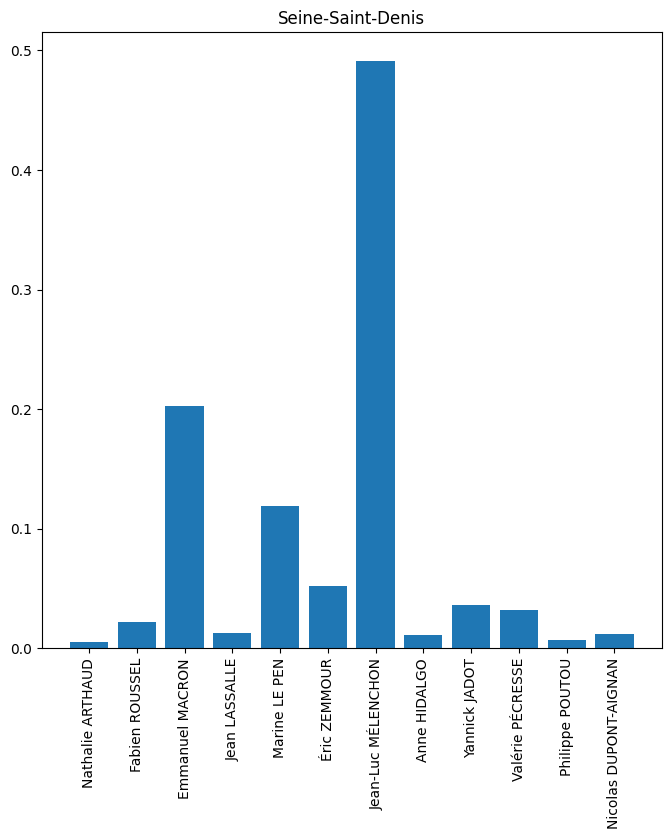

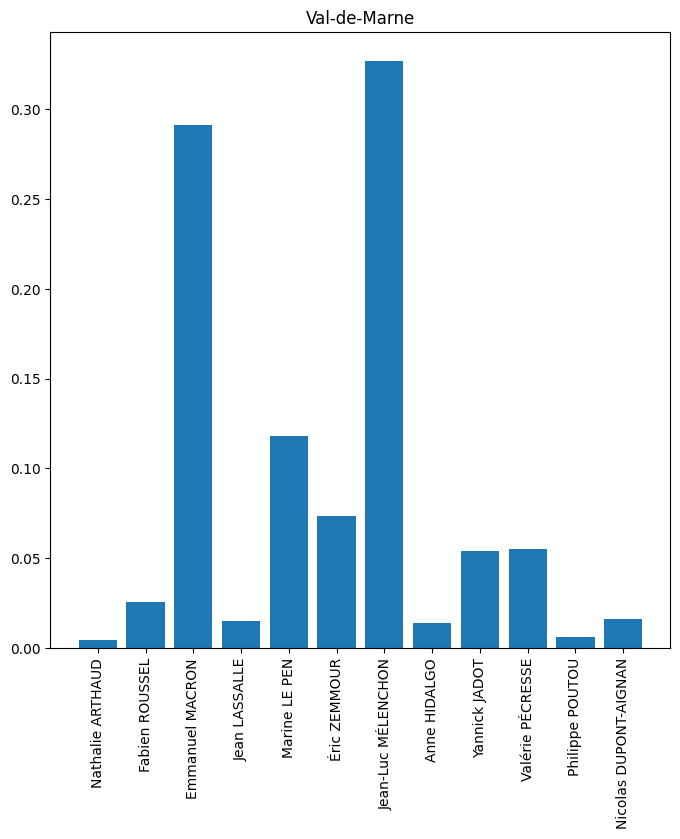

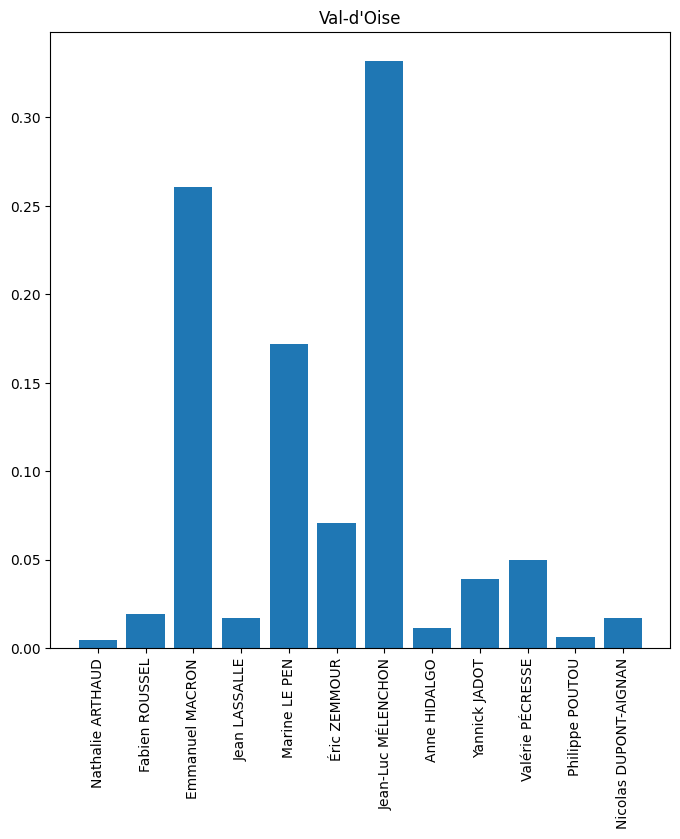

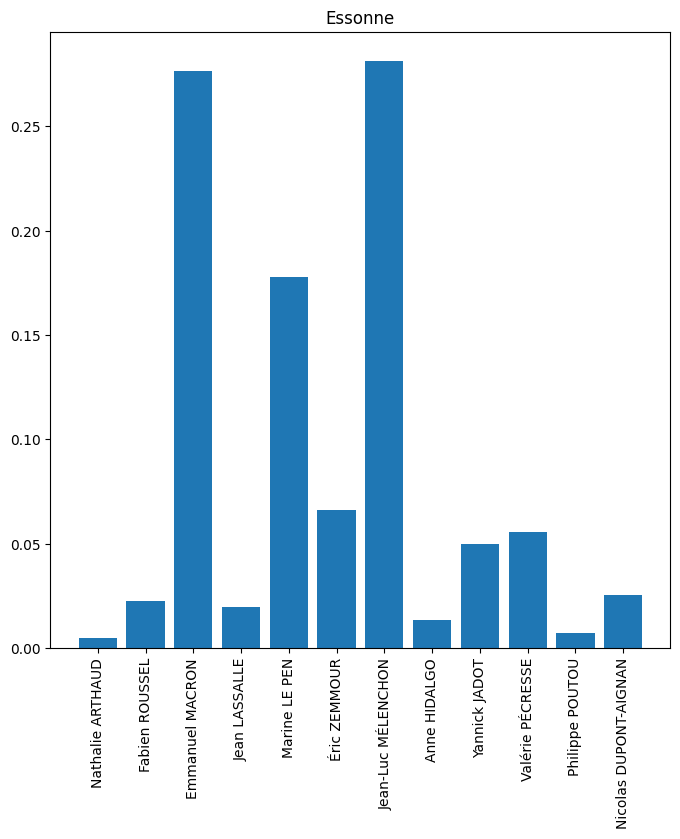

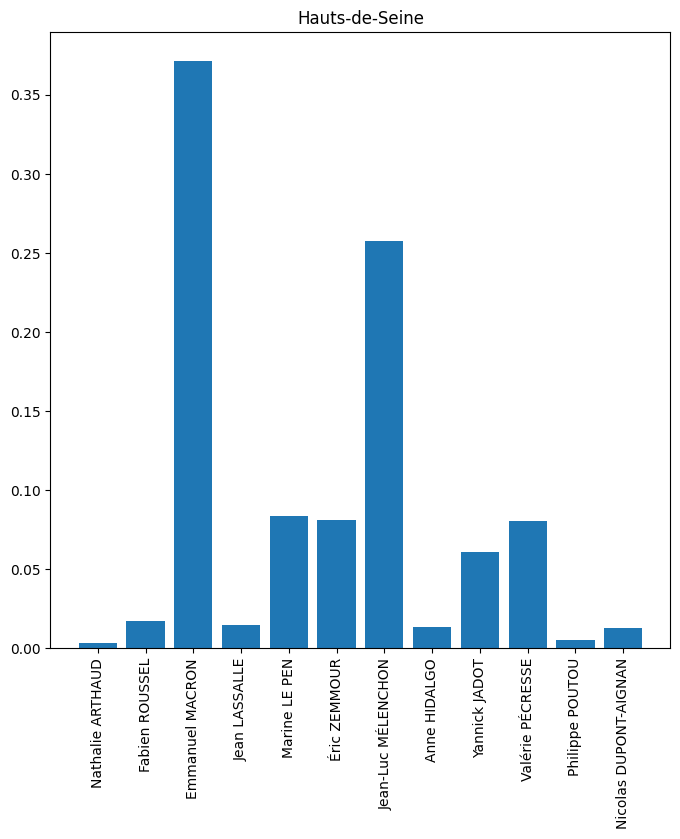

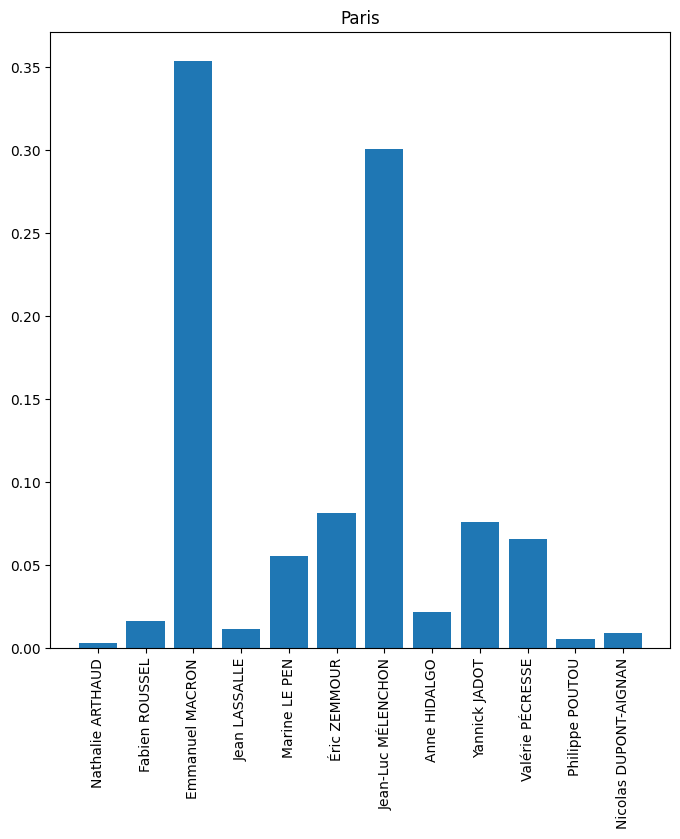

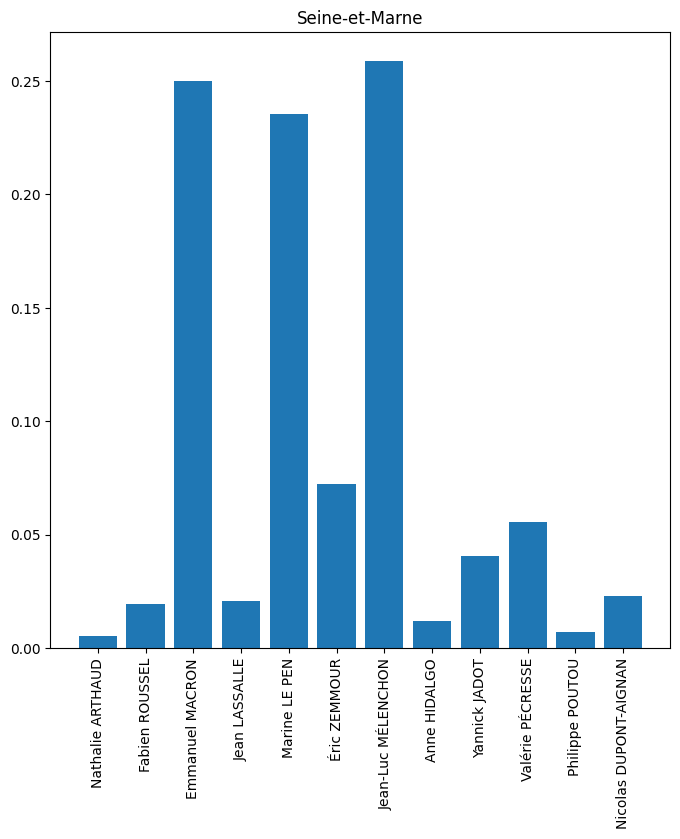

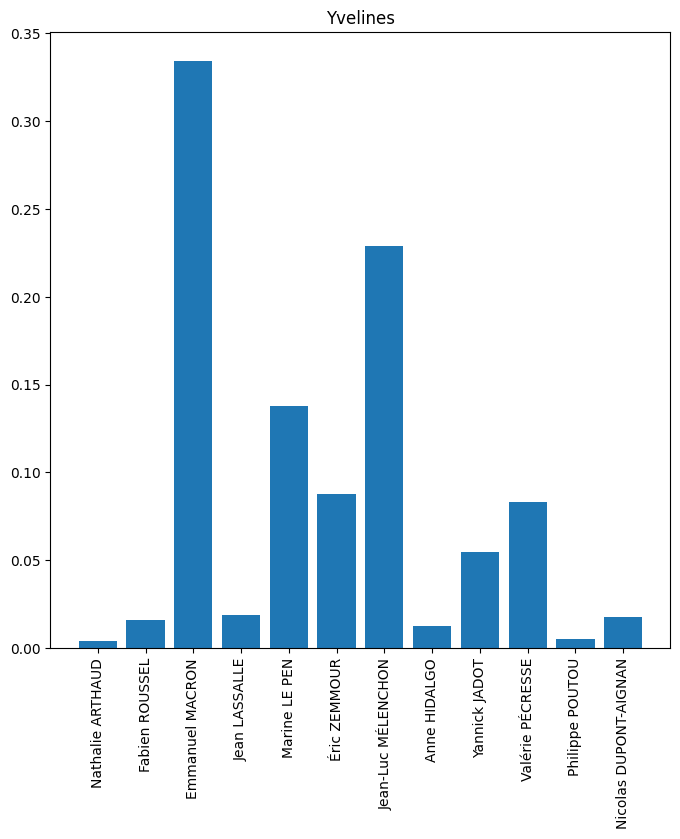

In [29]:
#Graphique de la Proportion de votes obtenus par candidat dans chaque département (profil ligne)
for dept in dept_names:
  plt.figure(figsize=(8,8))
  index_label = dept_names[dept_names == dept].index[0]
  plt.bar(col_names,(row_profile[index_label,:]))
  plt.title(dept)
  plt.xticks(rotation=90)

##INTERPRETATION DES INTENTIONS DE VOTES PAR DEPARTEMENT

- Seine-Saint-denis : le candidat Jean Luc Melenchon a obtenu 49,08% des voix, suivi du candidat Emmanuel Macron avec 20,27%.
- Val-de-Marne : le candidat Jean Luc Melenchon a obtenu 32,66% des voix, suivi du candidat Emmanuel Macron avec 29,09%
- Val-d'Oise : le candidat Jean Luc Melenchon a obtenu 33,17% des voix, suivi du candidat Emmanuel Macron avec 26,08%
- Essonne : le candidat Jean Luc Melenchon a obtenu 28,12% des voix, suivi du candidat Emmanuel Macron avec 27,65%
- Hauts-de-Seine : le candidat Emmanuel Macron a obtenu 37,1% des voix, suivi du candidat Jean Luc Melenchon avec 25,76%
- Paris : le candidat Emmanuel Macron a obtenu 35,33% des voix, suivi du candidat Jean Luc Melenchon avec 30,08%
- Seine-et-Marne : le candidat Jean Luc Melenchon a obtenu 25,86% des voix, suivi du candidat Emmanuel Macron avec 24,99%
- Yvelines : le candidat Emmanuel Macron a obtenu 33,40% des voix, suivi du candidat Jean Luc Melenchon avec 22,88%

En général, les intentions de votes se portent vers les candidats Emmanuel Macron et Jean Luc Melenchon sur l'ensemble des départements d'Ile-De-France



In [30]:
#Repartition des votes obtenus par département pour chaque candidat (profil colonne)
# Calcul du profil colonne
col_sum = np.sum(X, axis=0)
col_profile = X / col_sum[np.newaxis, :]

# Affichage
print("Profil colonne:")
print(pd.DataFrame(col_profile, index=dept_names, columns=col_names))

Profil colonne:
                   Nathalie ARTHAUD  Fabien ROUSSEL  Emmanuel MACRON  \
Departement                                                            
Seine-Saint-Denis          0.125879        0.110732         0.066505   
Val-de-Marne               0.114369        0.142233         0.103522   
Val-d'Oise                 0.109254        0.095685         0.083445   
Essonne                    0.129305        0.128214         0.099351   
Hauts-de-Seine             0.105326        0.125265         0.173631   
Paris                      0.132045        0.164233         0.225163   
Seine-et-Marne             0.157121        0.122155         0.099777   
Yvelines                   0.126701        0.111483         0.148608   

                   Jean LASSALLE  Marine LE PEN  Éric ZEMMOUR  \
Departement                                                     
Seine-Saint-Denis       0.077911       0.090719      0.068318   
Val-de-Marne            0.102401       0.097825      0.106083   
Val

In [31]:
#vérifions la théorie - somme en colonne des proportions de vote = 1
print(np.sum(col_profile, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


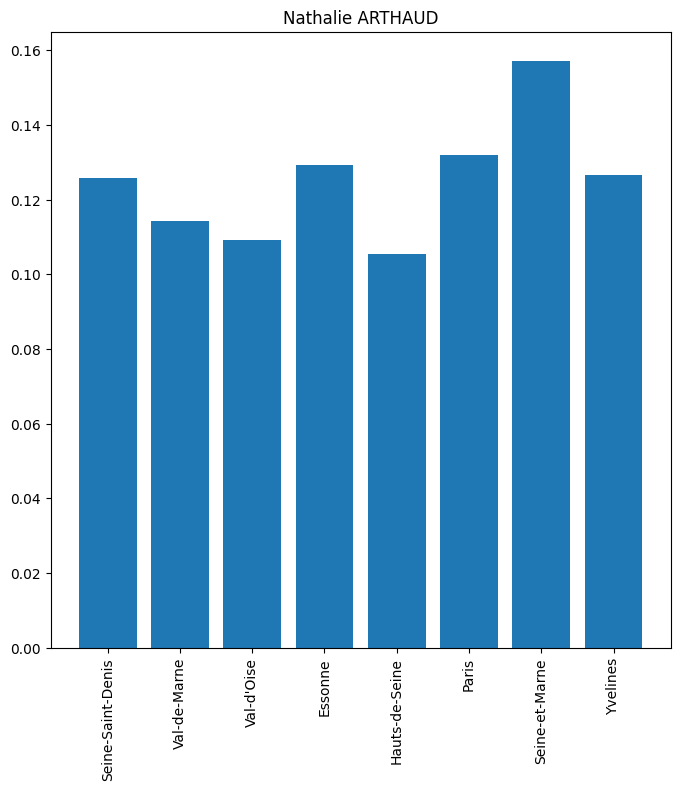

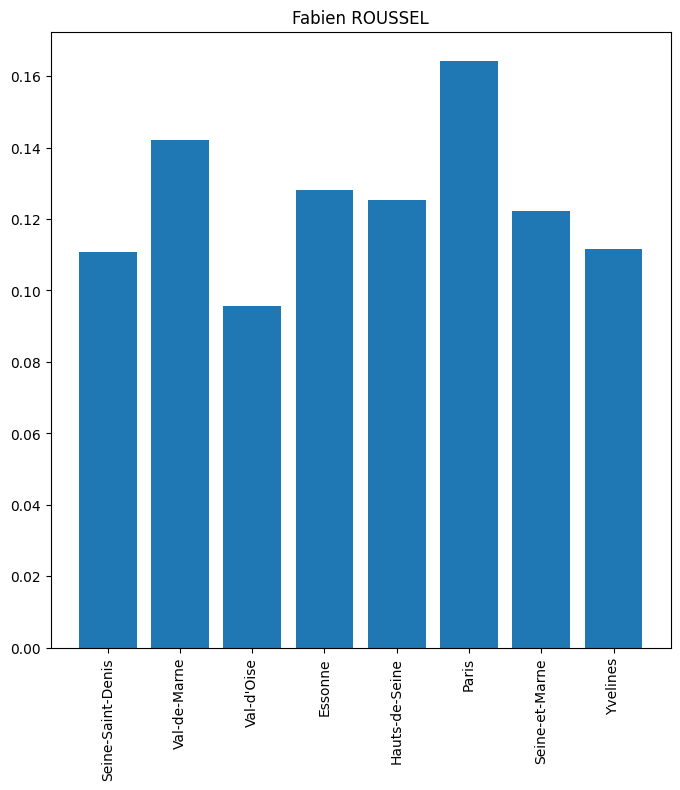

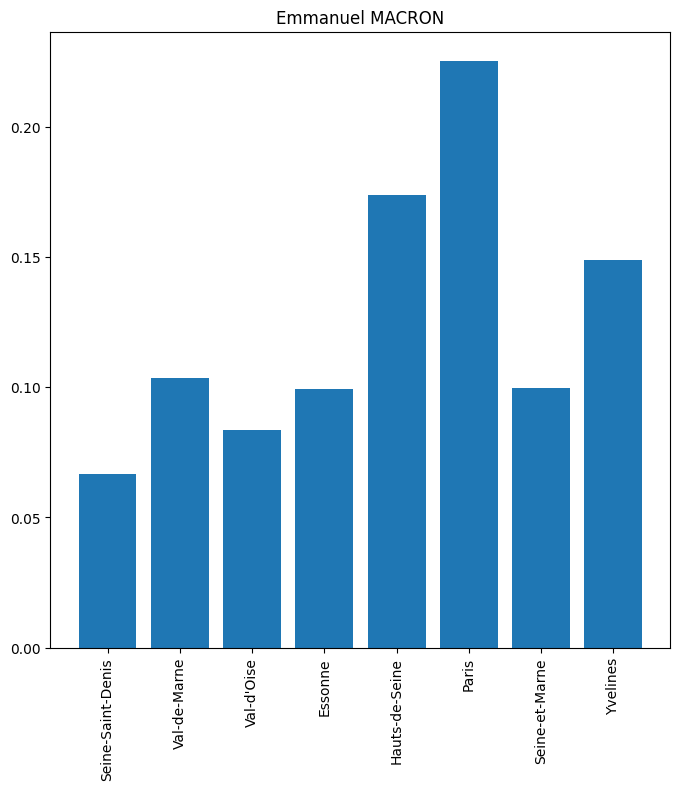

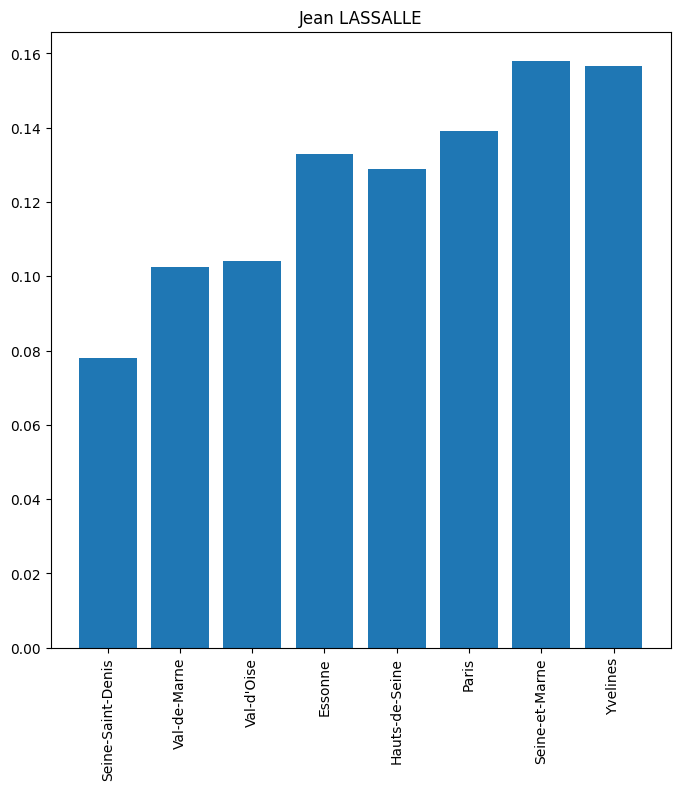

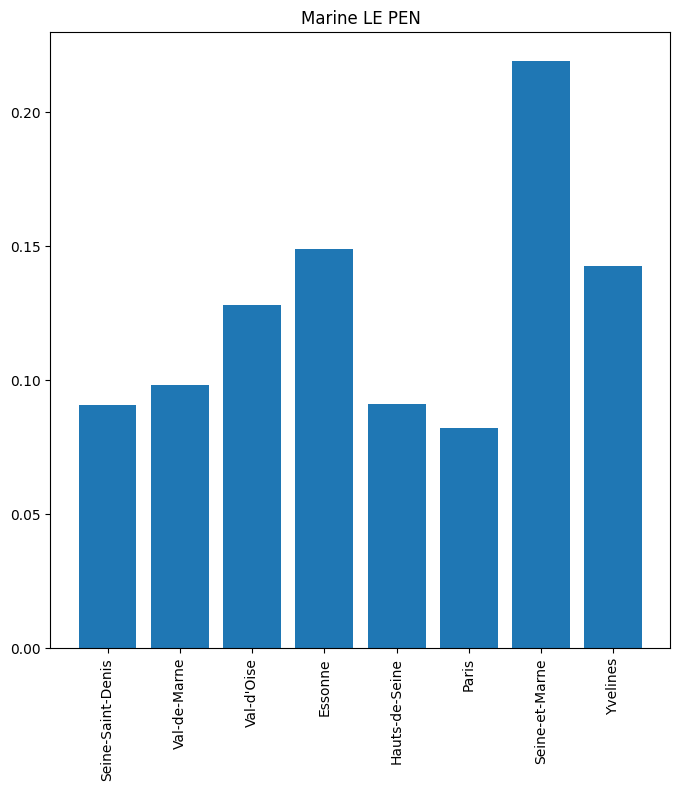

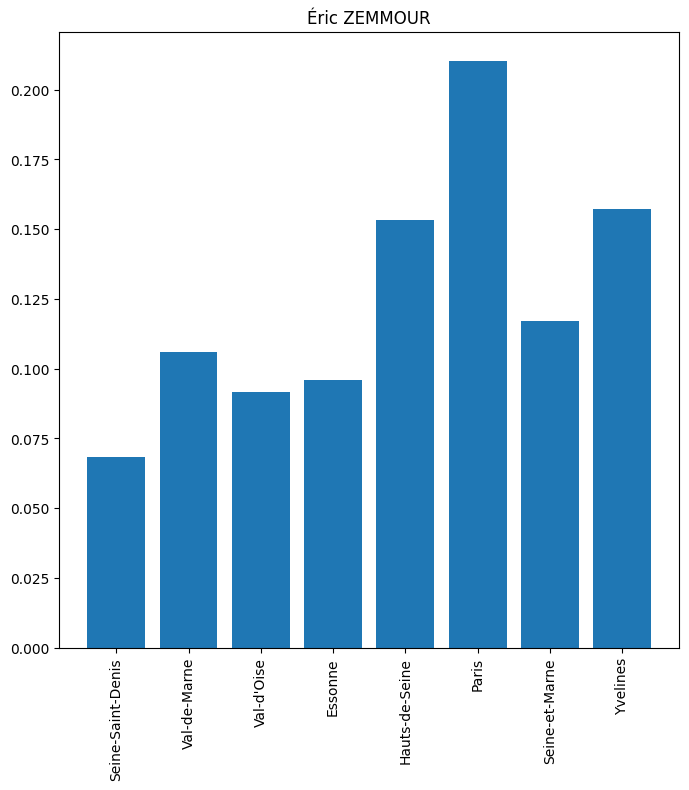

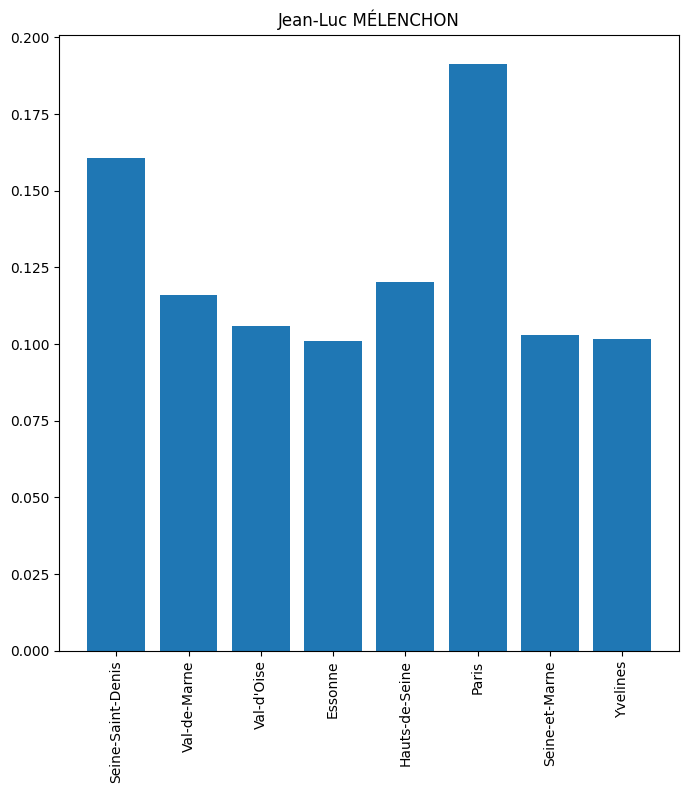

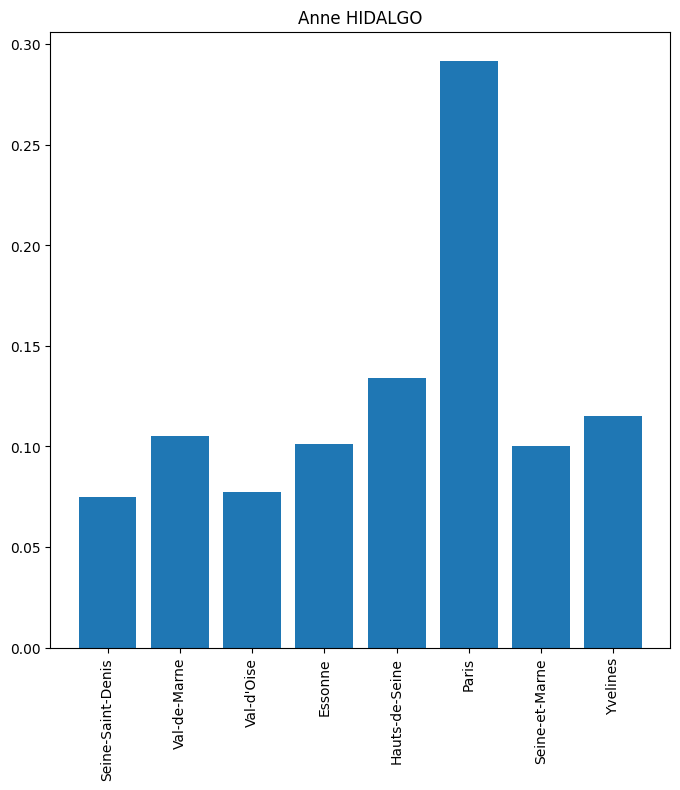

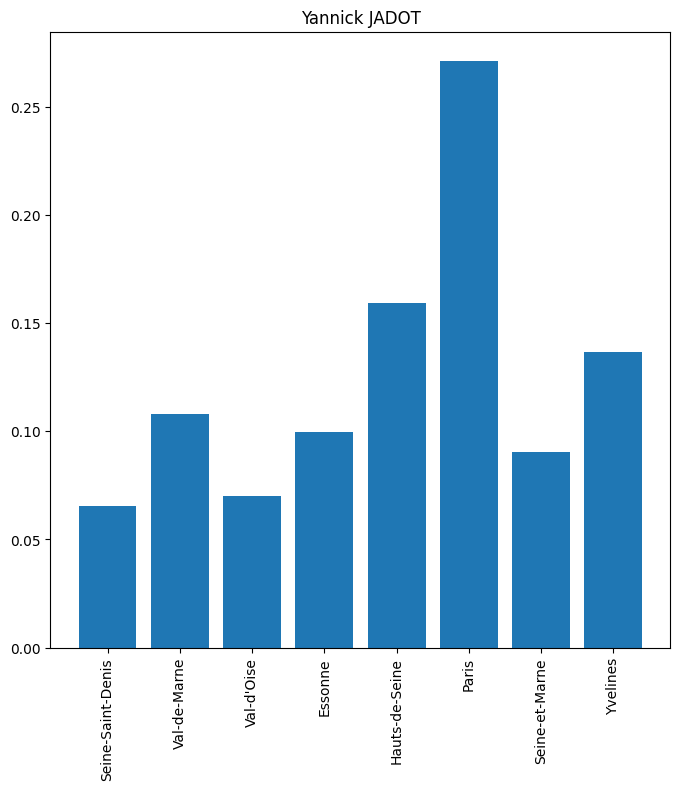

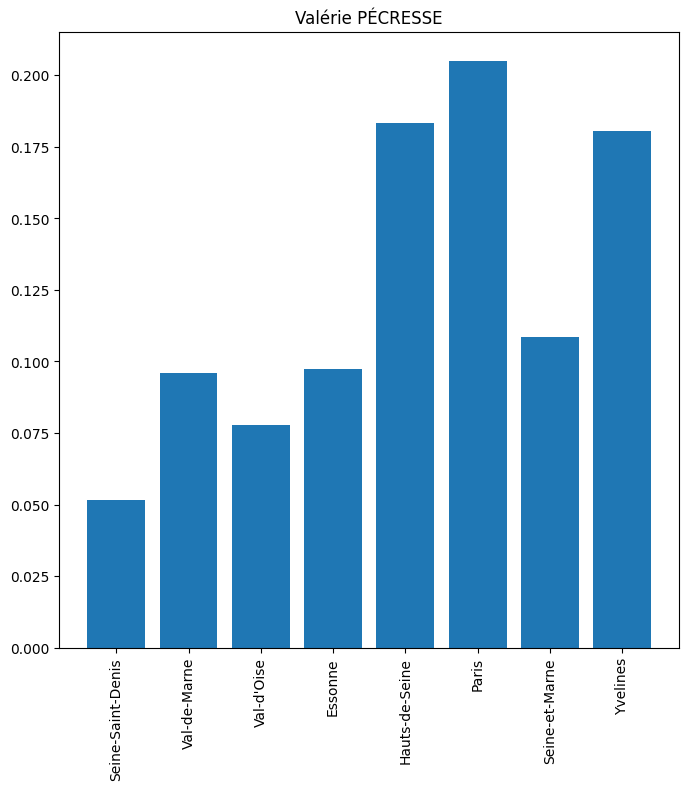

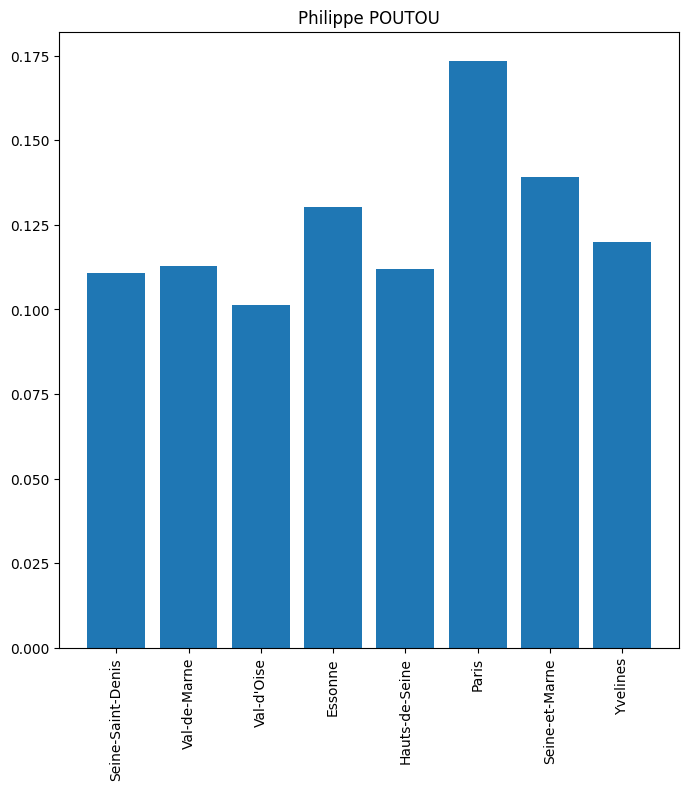

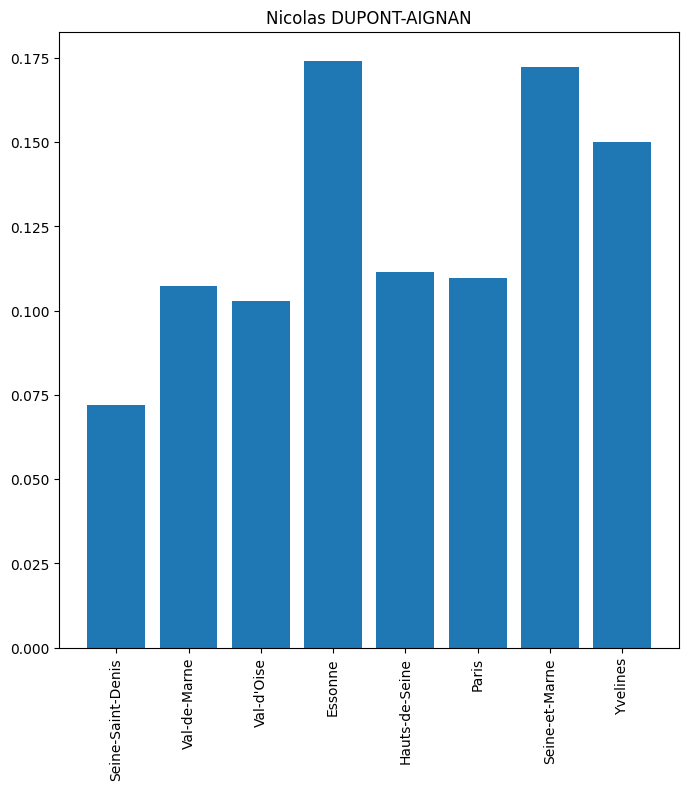

In [32]:
#Graphique de la Repartition des votes obtenus par département pour chaque candidat (profil colonne)
for col in col_names :
  plt.figure(figsize=(8,8))
  plt.bar(dept_names,(col_profile[:,col_names.index(col)]))
  plt.title(col)
  plt.xticks(rotation=90)

##INTERPRETATION DE LA REPARTITION DES VOTES OBTENUS PAR LES CANDIDATS

- Les votes obtenus par Nathalie Arthaud sont équitablement repartis avec un max à 15,71 dans le departement Seine-et-Marne et un min de 10,53 en Haut-de-Seine.
- Emmanuel Macron est plus voté à Paris 22,51 et moins voté en Seine-Saint-Denis 6.65% : Seulement 6,65% de ceux qui vote pour le candidat Macron sont en Seine-Saint-Denis
- Jean Luc Melenchon obtient son max de votant à Paris avec 19,13% et son min en Essonne 10,08%
- Les votes obtenus par Philippe Poutou sont équitablement repartis avec un max à 17,34 à Paris et un min de 10,14 en Val-d'Oise.
- Les votes obtenus par Anne Hidalgo sont dispersés avec 29,16% à Paris et 7,5% en Seine-Saint-Denis.

In [33]:
#Repartition des votes par candidat dans toute la région (classement)
#somme des votes par candidat
prop_votes  = data[col_names].sum()
prop_votes

,0
Nathalie ARTHAUD,21894
Fabien ROUSSEL,105137
Emmanuel MACRON,1655780
Jean LASSALLE,87343
Marine LE PEN,711462
Éric ZEMMOUR,409396
Jean-Luc MÉLENCHON,1658601
Anne HIDALGO,78522
Yannick JADOT,296087
Valérie PÉCRESSE,339371


In [34]:
#Tri par ordre décroissant
prop_votes = prop_votes.sort_values(ascending=False)
prop_votes

,0
Jean-Luc MÉLENCHON,1658601
Emmanuel MACRON,1655780
Marine LE PEN,711462
Éric ZEMMOUR,409396
Valérie PÉCRESSE,339371
Yannick JADOT,296087
Fabien ROUSSEL,105137
Jean LASSALLE,87343
Nicolas DUPONT-AIGNAN,87331
Anne HIDALGO,78522


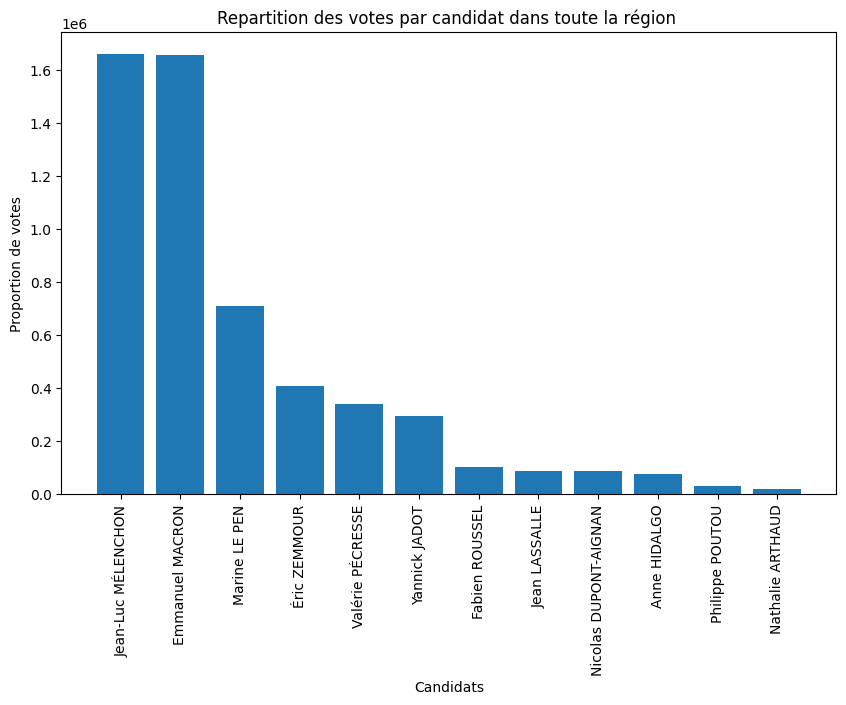

In [35]:
#Graphique
plt.figure(figsize=(10,6))
plt.bar(prop_votes.index, prop_votes)
plt.title("Repartition des votes par candidat dans toute la région ")
plt.xticks(rotation=90)
plt.xlabel("Candidats")
plt.ylabel("Proportion de votes")
plt.show()

In [36]:
#Repartition en pourcentage
prop_votes_perc = prop_votes/np.sum(prop_votes)
prop_votes_perc

,0
Jean-Luc MÉLENCHON,0.302445
Emmanuel MACRON,0.301931
Marine LE PEN,0.129735
Éric ZEMMOUR,0.074653
Valérie PÉCRESSE,0.061884
Yannick JADOT,0.053991
Fabien ROUSSEL,0.019172
Jean LASSALLE,0.015927
Nicolas DUPONT-AIGNAN,0.015925
Anne HIDALGO,0.014318


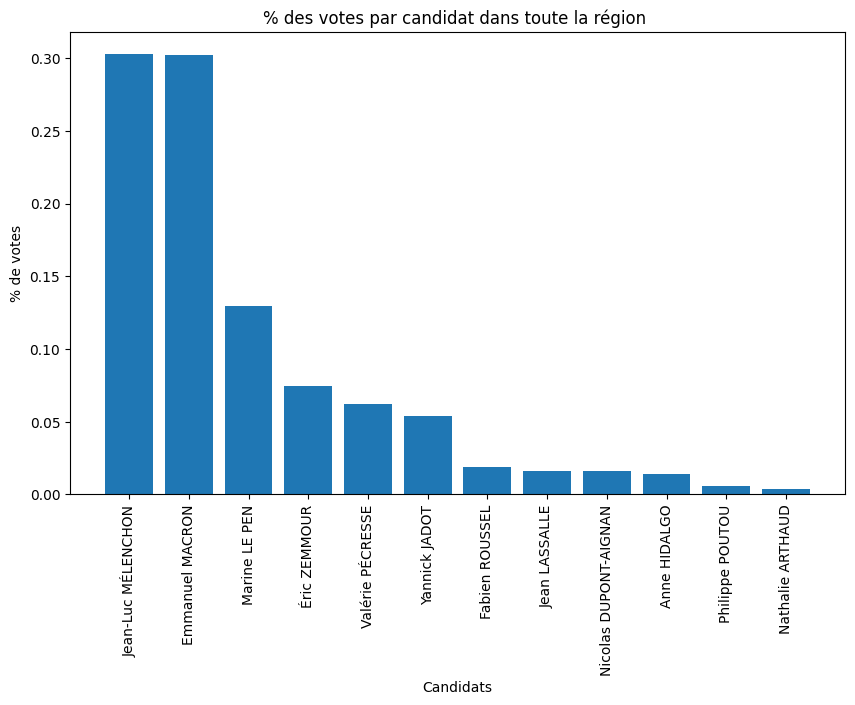

In [37]:
#Graphique
plt.figure(figsize=(10,6))
plt.bar(prop_votes_perc.index, prop_votes_perc)
plt.title("% des votes par candidat dans toute la région ")
plt.xticks(rotation=90)
plt.xlabel("Candidats")
plt.ylabel("% de votes")
plt.show()

##INTERPRETATION DES VOTES

Jean Luc Melenchon et Emmanuel Macron sont en tête des votes dans la region IDF avec respectivement 30.24% et 30.19% suivis de Marine Le Pen avec 12,97%.


#ETUDE DE L'ASSOCIATION ENTRE LES MODALITES AVEC L'AFC

- Y a t'il des départements qui se ressemblent en terme d'intention de votes ?
- Y a t'il des candidats qui se ressemblent en terme d'intention de votes ?

In [38]:
#mettre Departement comme index du tableau
data = data.set_index('Departement')

#instancier un objet ca de la classe CA
afc = CA(row_labels=data.index.values, col_labels=col_names, stats=True)

#Utiliser la methode fit sur l'objet pour estimer l'AFC
afc.fit(data.values)

CA(col_labels=['Nathalie ARTHAUD', 'Fabien ROUSSEL', 'Emmanuel MACRON',
               'Jean LASSALLE', 'Marine LE PEN', 'Éric ZEMMOUR',
               'Jean-Luc MÉLENCHON', 'Anne HIDALGO', 'Yannick JADOT',
               'Valérie PÉCRESSE', 'Philippe POUTOU', 'Nicolas DUPONT-AIGNAN'],
   row_labels=array(['Seine-Saint-Denis', 'Val-de-Marne', "Val-d'Oise", 'Essonne',
       'Hauts-de-Seine', 'Paris', 'Seine-et-Marne', 'Yvelines'],
      dtype=object))

###Axes factoriels


In [39]:
#Identification des valeurs propres
afc.eig_

array([[3.67708156e-02, 2.41324630e-02, 1.19731847e-03, 5.41407476e-04,
        1.51718248e-04, 1.35166582e-04, 2.74627897e-05],
       [5.84068396e+01, 3.83320541e+01, 1.90182313e+00, 8.59972756e-01,
        2.40989579e-01, 2.14698878e-01, 4.36219520e-02],
       [5.84068396e+01, 9.67388937e+01, 9.86407168e+01, 9.95006896e+01,
        9.97416792e+01, 9.99563780e+01, 1.00000000e+02]])

In [40]:
# prompt: explique moi le retour de afc.eig_

#La méthode `afc.eig_` de la librairie `fanalysis` en Python, après avoir effectué une Analyse Factorielle des Correspondances (AFC) sur un
#tableau de contingence, retourne un tableau (ou DataFrame Pandas) présentant les valeurs propres de l'AFC.
#Chaque valeur propre correspond à un axe factoriel.

#Plus précisément, ce tableau contient généralement les informations suivantes pour chaque axe :

#Valeur propre :  Représente la quantité d'inertie (variance) expliquée par l'axe factoriel. Les valeurs propres les plus importantes
#indiquent les axes qui expliquent le plus de variation dans les données.  En d'autres termes, les premiers axes factoriels capturent les
#relations les plus importantes entre les lignes et les colonnes du tableau de contingence.

#Pourcentage d'inertie :  Représente le pourcentage de la variance totale expliquée par l'axe. La somme de tous les pourcentages d'inertie
#doit être égale à 100 %.  Cela permet de visualiser la contribution de chaque axe à la description des données globales.

#Pourcentage d'inertie cumulé : Représente la somme des pourcentages d'inertie des axes précédents et de l'axe courant.
#Ce cumul permet de déterminer le nombre d'axes nécessaires pour expliquer une part importante de l'inertie totale.  Un critère
#courant est de conserver les axes dont le pourcentage d'inertie cumulé est supérieur à un certain seuil (par exemple 80%).

In [41]:
#Nombre de valeurs propres
# prompt: pourquoi j'ai 7 valeurs propres

# Le nombre de valeurs propres correspond à la dimension la plus petite de votre tableau de contingence.
# Votre tableau contient 8 lignes (départements) et 13 colonnes (candidats).
# Par conséquent, vous aurez min(8-1, 13-1) = min(7,12) = 7 valeurs propres.

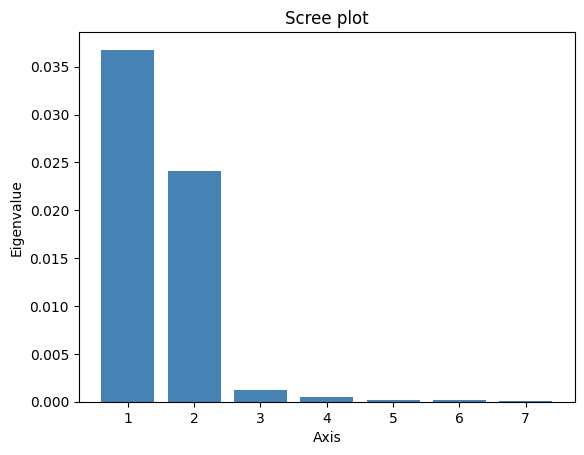

In [42]:
#Scree plot pour choisir le nombre d'axe par la methode du coude (elbow methode)
afc.plot_eigenvalues()

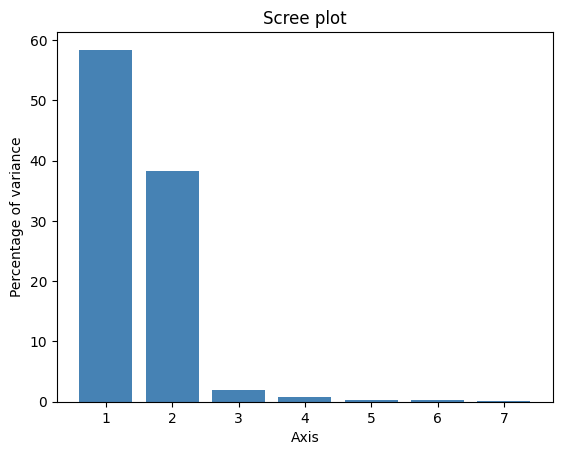

In [43]:
#Pourcentage expliqué
afc.plot_eigenvalues(type = 'percentage')

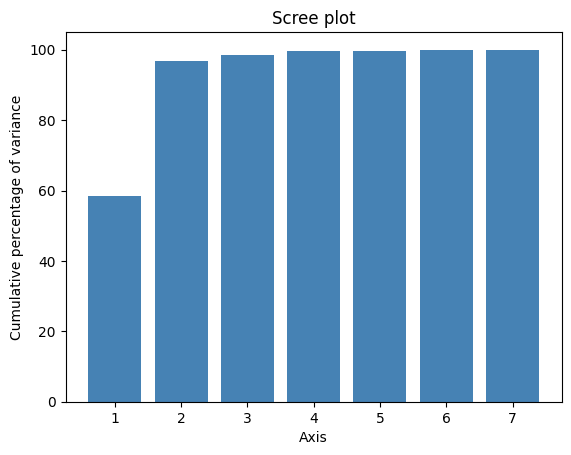

In [44]:
#Pourcentage expliqué cumulé
afc.plot_eigenvalues(type = 'cumulative')

###Choix du nombre d'axe

Selon la methode du coude, nous pouvons choisir les 2 premiers axes factoriels dont le 1er explique 58.4% et le second 38.33%, soit 96.72% de la variance totale.



###Aide à l'interpretation

Analyse de la qualité de representation et de la contribution à la formation des axes

In [45]:
#Analyse de la qualité de representation (profil ligne)
# afc.row_cos2_  donne la qualité de représentation de chaque département sur les axes factoriels.
cos_square_df = pd.DataFrame(afc.row_cos2_, columns = ["Axe{}".format(i+1) for i in range (afc.row_cos2_.shape[1])])
cos_square_df.index = dept_names
print(cos_square_df)

                       Axe1      Axe2      Axe3      Axe4      Axe5      Axe6  \
Departement                                                                     
Seine-Saint-Denis  0.200611  0.793494  0.005023  0.000124  0.000451  0.000227   
Val-de-Marne       0.002688  0.653406  0.025647  0.171895  0.143866  0.002159   
Val-d'Oise         0.951167  0.015141  0.006815  0.013077  0.001515  0.006813   
Essonne            0.675806  0.210147  0.038930  0.063324  0.011460  0.000043   
Hauts-de-Seine     0.880328  0.066944  0.042702  0.003013  0.000356  0.006353   
Paris              0.899943  0.067826  0.027503  0.004580  0.000111  0.000032   
Seine-et-Marne     0.716855  0.271960  0.004249  0.006181  0.000061  0.000198   
Yvelines           0.112407  0.820361  0.050706  0.001811  0.000016  0.014560   

                       Axe7  
Departement                  
Seine-Saint-Denis  0.000071  
Val-de-Marne       0.000340  
Val-d'Oise         0.005473  
Essonne            0.000290  
Hauts-de-

In [46]:
#vérifions la théorie - somme en ligne des cos2 = 1
print(np.sum(cos_square_df,axis=1))

Departement
Seine-Saint-Denis    1.0
Val-de-Marne         1.0
Val-d'Oise           1.0
Essonne              1.0
Hauts-de-Seine       1.0
Paris                1.0
Seine-et-Marne       1.0
Yvelines             1.0
dtype: float64


Premier axe factoriel


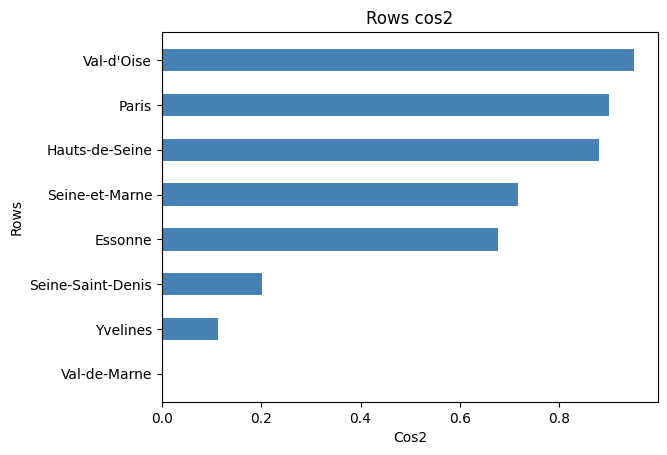

Second axe factoriel


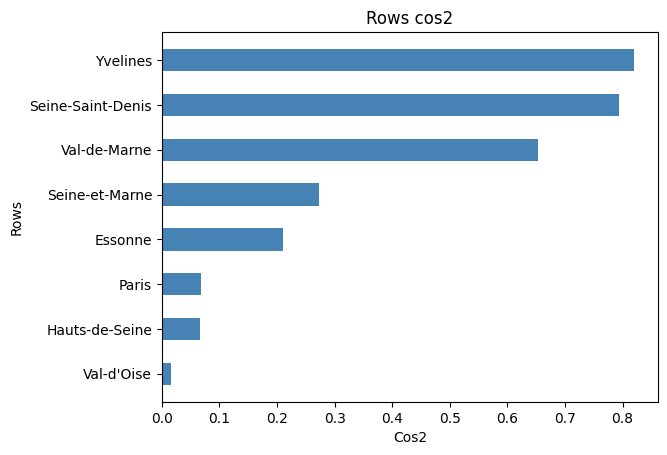

In [47]:
#Afficher les cos2 sur les graphiques
print("Premier axe factoriel")
afc.plot_row_cos2(num_axis=1)
print("Second axe factoriel")
afc.plot_row_cos2(num_axis=2)

####Interpretation de la qualité de representation des départements
Le seuil couramment utilisé pour interpréter la qualité de représentation des variables est 0,5. Si le cos2 d'un département est supérieur à 0,5 sur un axe principal, cela signifie que cet departement est bien représenté sur cet axe.

- Sur l'axe 1 : La plupart des départements sont bien representés. On pourra donc les interpreter. Parmi eux : Val-d'Oise, Paris, Hauts-de-Seine, Seine-et-Marne et Essonne avec respectivement un cos2 à 0.95, 0.89, 0.88, 0.71, 0.67

- Sur l'axe 2 : Les départements Yvelines, Seine-Saint-Denis et Val-de-Marne sont bien representés avec respectivement un cos2 à 0.82, 0.79, 0.65

In [48]:
#Analyse de la qualité de representation (profil colonne)
# afc.col_cos2_  donne la qualité de représentation de chaque candidat sur les axes factoriels.
cos_squar_df = pd.DataFrame(afc.col_cos2_, columns = ["Axe{}".format(i+1) for i in range (afc.col_cos2_.shape[1])])
cos_squar_df.index = col_names
print(cos_squar_df)

                           Axe1      Axe2      Axe3      Axe4          Axe5  \
Nathalie ARTHAUD       0.975812  0.003026  0.000177  0.009693  6.554746e-04   
Fabien ROUSSEL         0.311467  0.088491  0.048979  0.415230  1.306637e-01   
Emmanuel MACRON        0.848327  0.143942  0.001638  0.000732  1.344794e-04   
Jean LASSALLE          0.433895  0.536393  0.006501  0.012260  1.220339e-03   
Marine LE PEN          0.805374  0.192711  0.000412  0.001301  9.502740e-08   
Éric ZEMMOUR           0.482436  0.417733  0.002441  0.039815  3.709709e-02   
Jean-Luc MÉLENCHON     0.096794  0.901532  0.001441  0.000108  9.910558e-05   
Anne HIDALGO           0.546128  0.014640  0.405356  0.032076  1.350306e-03   
Yannick JADOT          0.865435  0.007509  0.122092  0.000379  5.749398e-04   
Valérie PÉCRESSE       0.464862  0.447589  0.075942  0.000058  1.190992e-03   
Philippe POUTOU        0.780409  0.015253  0.158016  0.036726  3.017281e-03   
Nicolas DUPONT-AIGNAN  0.507327  0.352370  0.010624 

In [49]:
#vérifions la théorie - somme en ligne des cos2 = 1
print(np.sum(cos_squar_df,axis=1))

Nathalie ARTHAUD         1.0
Fabien ROUSSEL           1.0
Emmanuel MACRON          1.0
Jean LASSALLE            1.0
Marine LE PEN            1.0
Éric ZEMMOUR             1.0
Jean-Luc MÉLENCHON       1.0
Anne HIDALGO             1.0
Yannick JADOT            1.0
Valérie PÉCRESSE         1.0
Philippe POUTOU          1.0
Nicolas DUPONT-AIGNAN    1.0
dtype: float64


Premier axe factoriel


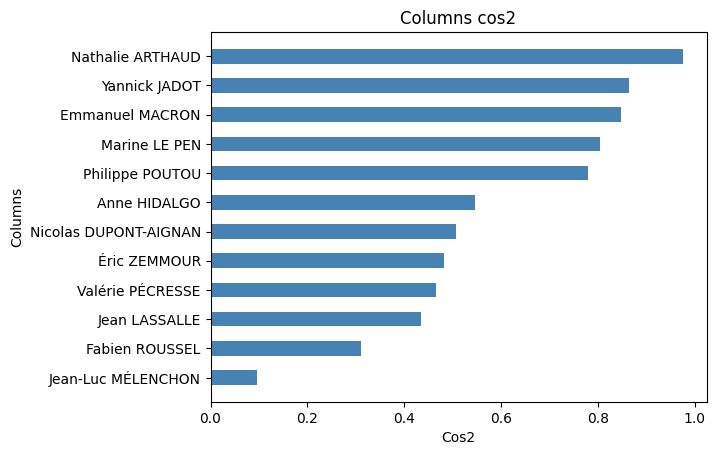

Second axe factoriel


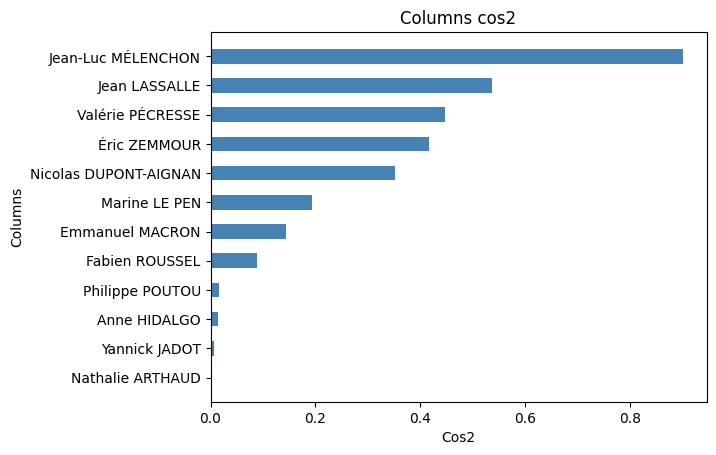

In [50]:
#Afficher les cos2 sur les graphiques
print("Premier axe factoriel")
afc.plot_col_cos2(num_axis=1)
print("Second axe factoriel")
afc.plot_col_cos2(num_axis=2)

####Interpretation de la qualité de representation des candidats

- Sur l'axe 1 les candidats bien representés sont :  Nathalie Arthaud(0.97), Yannick Jadot(0.86), Emmanuel Macron(0.84), Marine Le Pen(0.8),Philippe Poutou(0.78), Anne Hildago(0.54), Nicolas Dupont-Aignan(0.5)
- Sur l'axe 2 les candidats bien representés sont : Jean-Luc Mélenchon(0.9), Jean Lassalle(0.53)

In [51]:
#Analyse de la contribution à la formation des axes (profil ligne)
# afc.row_contrib_ donne la contribution de chaque département à la formation  des axes factoriels.
contrib_df = pd.DataFrame(afc.row_contrib_, columns = ["Axe{}".format(i+1) for i in range (afc.row_contrib_.shape[1])])
contrib_df.index = dept_names
print(contrib_df)

                        Axe1       Axe2       Axe3       Axe4       Axe5  \
Departement                                                                
Seine-Saint-Denis   9.834411  59.270531   7.562694   0.412428   5.356138   
Val-de-Marne        0.004859   1.799964   1.423984  21.106806  63.037884   
Val-d'Oise          7.394855   0.179359   1.627124   6.904885   2.853726   
Essonne             6.230463   2.952053  11.022383  39.649983  25.606399   
Hauts-de-Seine     16.014697   1.855616  23.857022   3.722568   1.567576   
Paris              33.038369   3.794036  31.008622  11.419966   0.991212   
Seine-et-Marne     26.129505  15.104514   4.756483  15.302771   0.539667   
Yvelines            1.352841  15.043927  18.741689   1.480592   0.047398   

                        Axe6       Axe7  
Departement                              
Seine-Saint-Denis   3.021325   4.638140  
Val-de-Marne        1.061684   0.823375  
Val-d'Oise         14.410030  56.973065  
Essonne             0.108532 

In [52]:
#vérifions la théorie somme des contributions des variables à un axe = 100%
print(np.sum(contrib_df,axis=0))

Axe1    100.0
Axe2    100.0
Axe3    100.0
Axe4    100.0
Axe5    100.0
Axe6    100.0
Axe7    100.0
dtype: float64


Premier axe factoriel


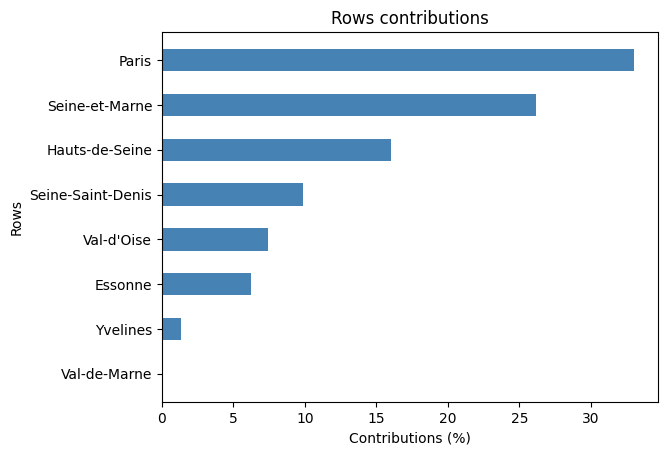

Second axe factoriel


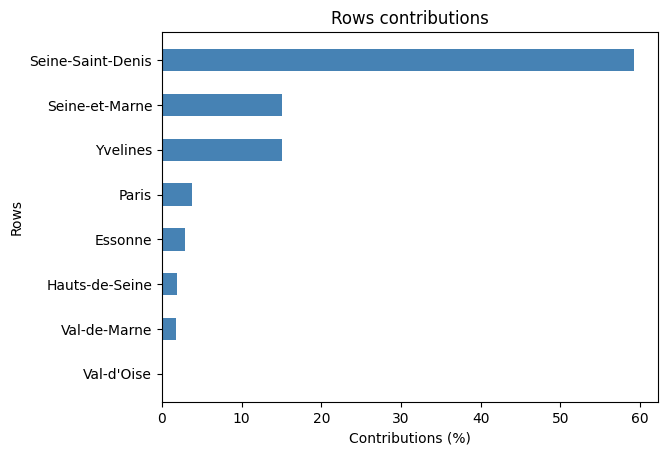

In [53]:
#Afficher les contributions sur les graphiques
print("Premier axe factoriel")
afc.plot_row_contrib(num_axis=1)
print("Second axe factoriel")
afc.plot_row_contrib(num_axis=2)

####Interpretation de la contribution des départements à la formation des axes
- Paris contribue à 33.03% dans la formation de l'axe 1 suivi de Seine-et-Marne à 26.13%
- Seine-Saint-Denis contribue à 59.27% dans la formation de l'axe 2 suivi de Seine-et-Marne à 15.1%


In [54]:
#Analyse de la contribution à la formation des axes (profil colonne)
# afc.col_contrib_ donne la contribution de chaque candidat à la formation  des axes factoriels.
contribt_df = pd.DataFrame(afc.col_contrib_, columns = ["Axe{}".format(i+1) for i in range (afc.col_contrib_.shape[1])])
contribt_df.index = col_names
print(contribt_df)

                            Axe1       Axe2       Axe3       Axe4       Axe5  \
Nathalie ARTHAUD        0.561550   0.002653   0.003133   0.378838   0.091420   
Fabien ROUSSEL          0.423768   0.183451   2.046521  38.369358  43.086098   
Emmanuel MACRON        21.922373   5.667787   1.299780   1.284091   0.842259   
Jean LASSALLE           0.791736   1.491353   0.364301   1.519420   0.539686   
Marine LE PEN          53.590946  19.538961   0.841954   5.881106   0.001533   
Éric ZEMMOUR            1.760388   2.322570   0.273502   9.867152  32.807550   
Jean-Luc MÉLENCHON      4.310823  61.177704   1.970337   0.327942   1.069730   
Anne HIDALGO            1.443617   0.058967  32.906940   5.758691   0.865078   
Yannick JADOT           7.825336   0.103453  33.903920   0.232629   1.259959   
Valérie PÉCRESSE        4.645889   6.815938  23.308809   0.039386   2.884823   
Philippe POUTOU         0.238415   0.007100   1.482537   0.762007   0.223404   
Nicolas DUPONT-AIGNAN   2.485158   2.630

In [55]:
#vérifions la théorie somme des contributions des variables à un axe = 100%
print(np.sum(contribt_df,axis=0))

Axe1    100.0
Axe2    100.0
Axe3    100.0
Axe4    100.0
Axe5    100.0
Axe6    100.0
Axe7    100.0
dtype: float64


Premier axe factoriel


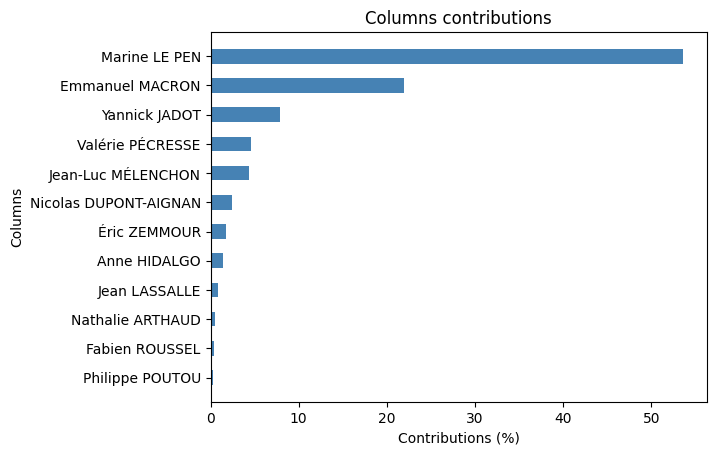

Second axe factoriel


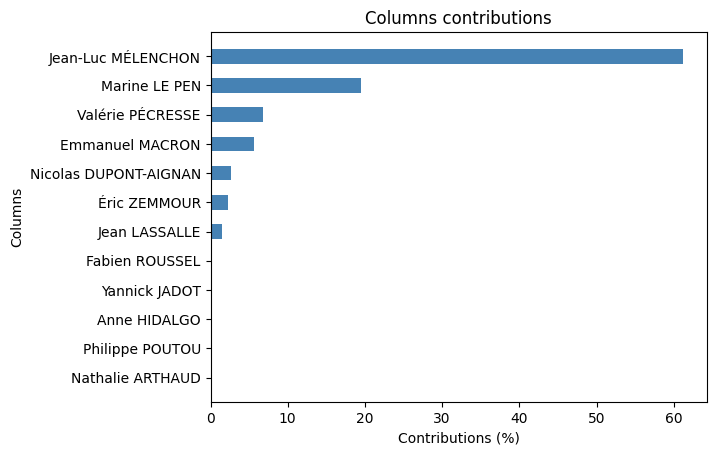

In [56]:
#Afficher les contributions sur les graphiques
print("Premier axe factoriel")
afc.plot_col_contrib(num_axis=1)
print("Second axe factoriel")
afc.plot_col_contrib(num_axis=2)

####Interpretation de la contribution des candidats à la formation des axes
- Marine Le Pen contribue à 53.59% dans la formation de l'axe 1 suivi de Emmanuel Macron à 21.92%
- Jean-Luc Melenchon contribue à 61.17% dans la formation de l'axe 2 suivi de Marine Le Pen à 19.54%

###REPRESENTATION GRAPHIQUE

In [57]:
#Coord, contrib et cos2 des departements
#afc.row_topandas()

#Coord, contrib et cos2 des candidats
#afc.col_topandas()

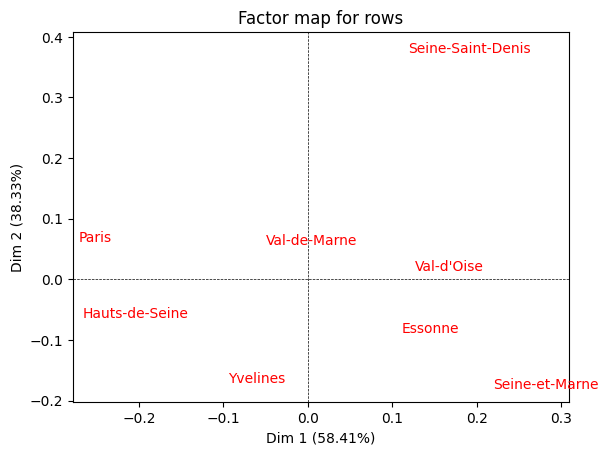

In [58]:
#Representation graphique des departements
afc.mapping_row(num_x_axis=1,num_y_axis=2)

####Interpretation du Mapping profil ligne
- Paris et Hauts-de-Seine se ressemblent en termes de votes. C'est à dire que les votants à Paris et ceux en Haut-de-Seine ont en général à peu près les mêmes intentions de votes.
- Val-d'Oise et Essonne se ressemblent aussi.
- Seine-et-Marne est opposé à Hauts-de-Seine et Paris  
- Yvelines et Seine-Saint-Denis sont très opposés. Il y a donc une grosse opposition d'intention de votes entre les votants en Yvelines et ceux en Seine-Saint-Denis



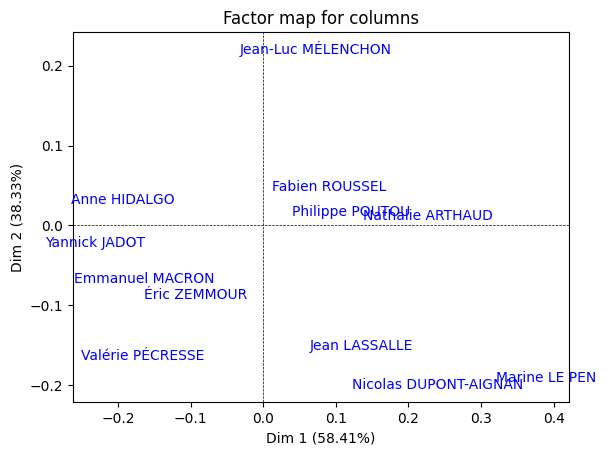

In [59]:
#Representation graphique des candidats
afc.mapping_col(num_x_axis=1,num_y_axis=2)

####Interpretation du mapping profil colonne
- Nathalie Arthaud et Philippe Poutou se ressemblent en termes de votes. Par exemple : Ils ont leur max de votes dans les mêmes départements
- De même, Anne Hidalgo, Yannick Jadot et Emmanuel Macron se ressemblent en termes de votes
- Il y a une opposition entre ceux qui votent pour Nathalie Arthaud et Philippe Poutou et ceux qui votent pour Anne Hidalgo, Emmanuel Macron et Yannick Jadot
- Marine Le Pen et Nicolas Dupont-Aignan se ressemblent en termes de votes
- Jean-Luc Mélenchon et Jean Lassalle sont opposés en terme d'intention de votes. Par Exemple : Jean Lassalle obtient ses votes max en Yvelines et en Seine-et-Marne, les départements où Jean-Luc Melenchon obtient ses votes min
- Il y a une opposition de votes entre Marine Le Pen, Nicolas Dupont-Aignan et Anne Hidalgo, Yannick Jadot, Emmanuel Macron


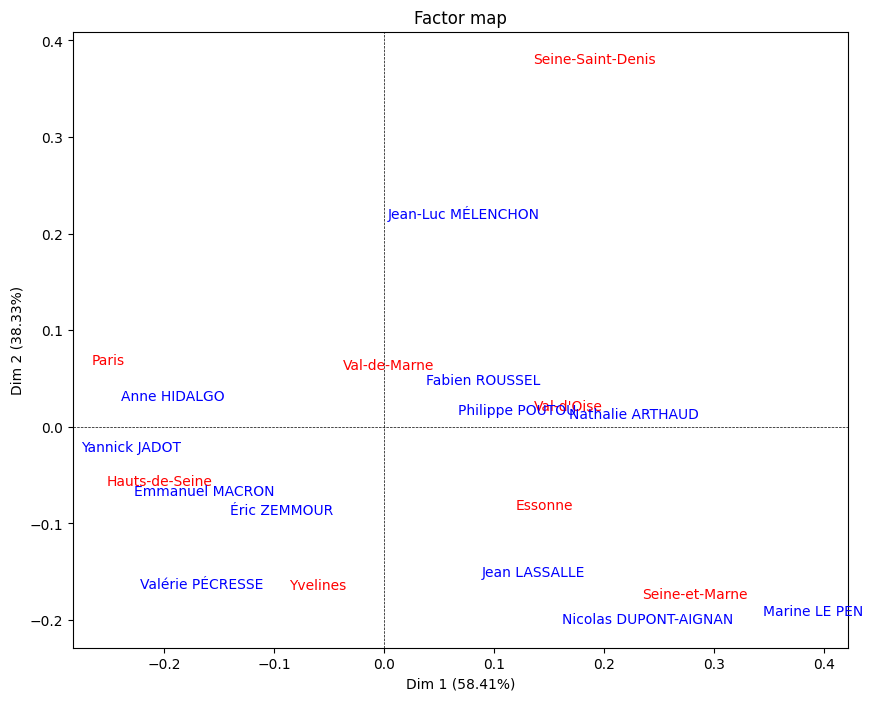

In [61]:
#Superposition départements et candidats
afc.mapping(1, 2, figsize=(10, 8))

####Interpretation de la superposition profil ligne-profil colonne
- Ceux qui votent pour Jean-Luc Mélenchon sont en général à Seine-Saint-Denis
- Anne Hidalgo, Yannick Jadot et Emmanuel Macron sont votés à Paris et en Hauts-de-Seine
- Marine Le Pen et Nicolas Dupont-Aignan sont bien votés en Seine-et-Marne

